# Chaos in Time-series Data

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
# logistic equation
def logistic(A, x):
    return A * x * (1 - x)

## Understanding basics of chaos using Logistic Equation

### Case: 0<A<1

In [3]:
n = np.linspace(0,10, num =10)

# intial condition
x0 = 0.5

x_1 = [0.5]
x_2 = [0.5]
x_3 = [0.5]

for i in range(1, 10):
  x_1.append(logistic(0.25, x_1[i-1]))
  x_2.append(logistic(0.5, x_2[i-1]))
  x_3.append(logistic(0.75, x_3[i-1]))

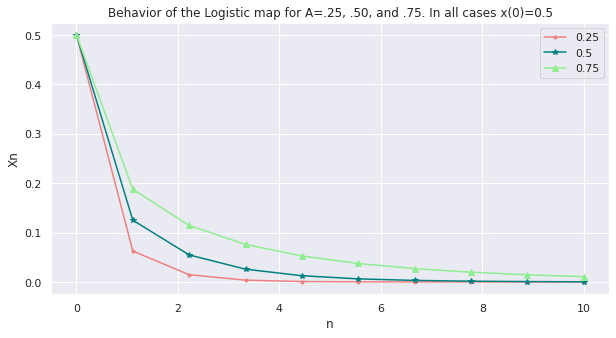

In [4]:
plt.figure(figsize=(10, 5))

# multiple line plots
plt.plot( n , x_1, marker='.', color='lightcoral', label="0.25")
plt.plot( n , x_2, marker='*', color='teal', label="0.5")
plt.plot( n , x_3, marker='^', color='lightgreen', label="0.75")

# axis
plt.xlabel('n')
plt.ylabel('Xn')

# show legend
plt.legend()

# show title
plt.title('Behavior of the Logistic map for A=.25, .50, and .75. In all cases x(0)=0.5')

# show graph
plt.show()

### Case: 1<A<3

In [5]:
n = np.linspace(0,10, num =10)

# intial condition
y0 = 0.5

y_1 = [0.5]
y_2 = [0.5]
y_3 = [0.5]

for i in range(1, 10):
  y_1.append(logistic(1.25, y_1[i-1]))
  y_2.append(logistic(2, y_2[i-1]))
  y_3.append(logistic(2.75, y_3[i-1]))

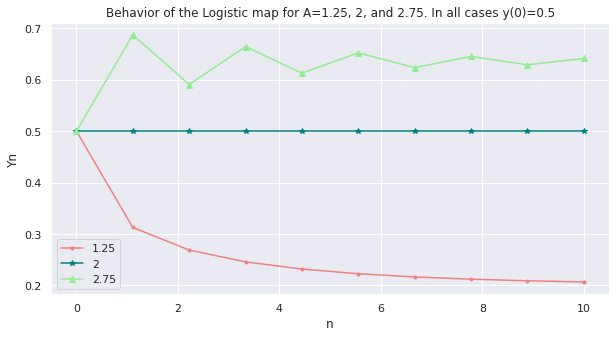

In [6]:
plt.figure(figsize=(10, 5))

# multiple line plots
plt.plot( n , y_1, marker='.', color='lightcoral', label="1.25")
plt.plot( n , y_2, marker='*', color='teal', label="2")
plt.plot( n , y_3, marker='^', color='lightgreen', label="2.75")

# axis
plt.xlabel('n')
plt.ylabel('Yn')

# show legend
plt.legend()

# show title
plt.title('Behavior of the Logistic map for A=1.25, 2, and 2.75. In all cases y(0)=0.5')

# show graph
plt.show()

### Case: A>3

In [7]:
n = np.linspace(0,25, num =25)

# intial condition
z0 = 0.5

z_1 = [0.5]
z_2 = [0.5]
z_3 = [0.5]

for i in range(1, 25):
  z_1.append(logistic(3.2, z_1[i-1]))
  z_2.append(logistic(3.49, z_2[i-1]))
  z_3.append(logistic(3.99, z_3[i-1]))

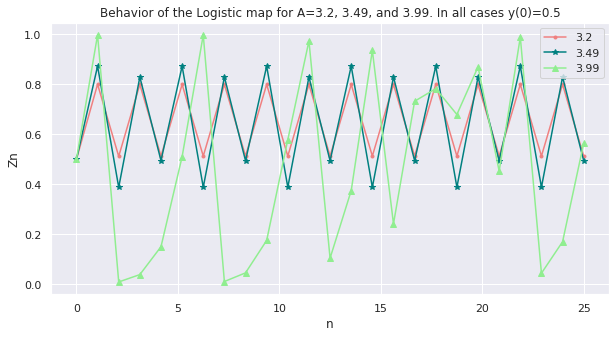

In [8]:
plt.figure(figsize=(10, 5))

# multiple line plots
plt.plot( n , z_1, marker='.', color='lightcoral', label="3.2")
plt.plot( n , z_2, marker='*', color='teal', label="3.49")
plt.plot( n , z_3, marker='^', color='lightgreen', label="3.99")

# axis
plt.xlabel('n')
plt.ylabel('Zn')

# show legend
plt.legend()

# show title
plt.title('Behavior of the Logistic map for A=3.2, 3.49, and 3.99. In all cases y(0)=0.5')

# show graph
plt.show()

## Senstivity to Initial Condition

In [9]:
x = np.linspace(0, 50)

In [10]:
temp = []
x0 = 0.3
temp.append(x0)
for i in range(49):
  y = logistic(3.99, temp[i-1])
  temp.append(y)

In [11]:
new_temp = []
x0 = 0.31
new_temp.append(x0)
for i in range(49):
  y = logistic(3.99, new_temp[i-1])
  new_temp.append(y)

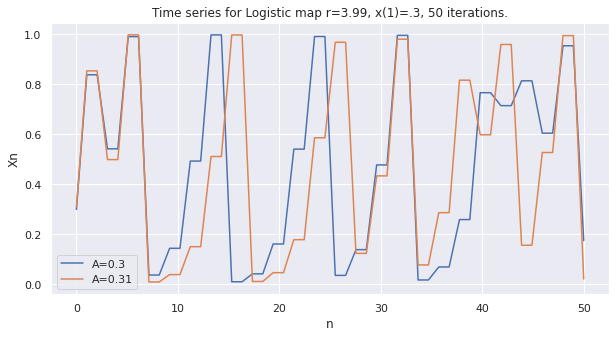

In [12]:
plt.figure(figsize=(10, 5))

# multiple line plots
plt.plot(x, temp, label='A=0.3')
plt.plot(x, new_temp, label='A=0.31')

# axis
plt.xlabel('n')
plt.ylabel('Xn')

# show legend
plt.legend()

# show title
plt.title('Time series for Logistic map r=3.99, x(1)=.3, 50 iterations.')

# show graph
plt.show()

## Return Map

In [13]:
def plot_system(r, x0, n, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$A={r:.1f}, \, x_0={x0:.1f}$")


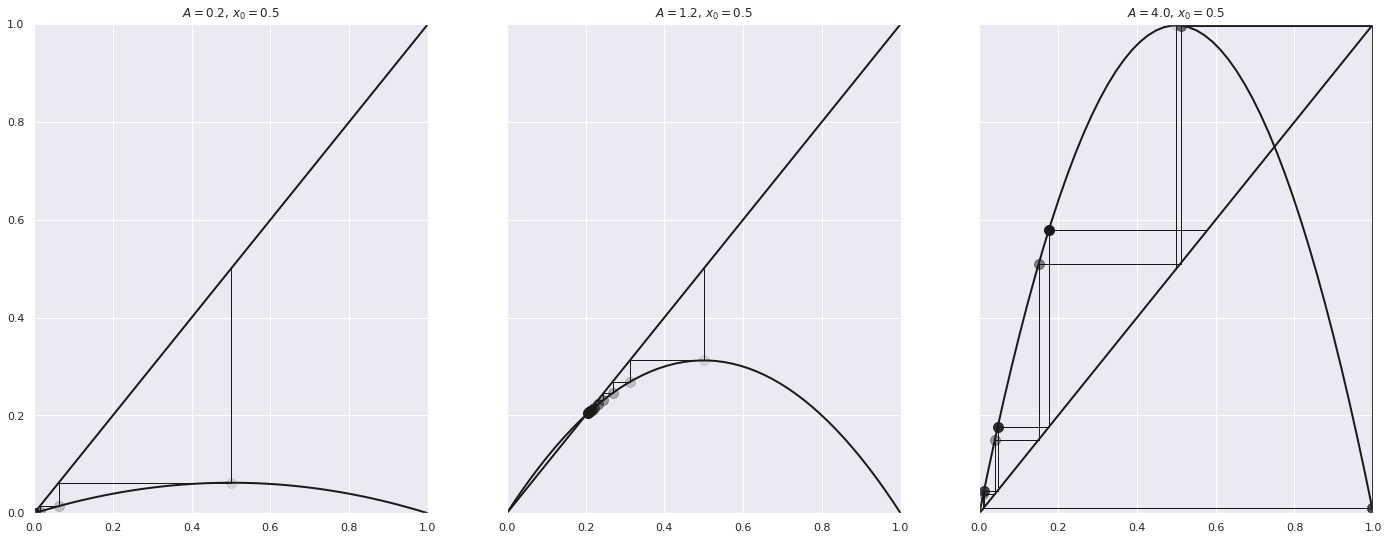

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9), sharey=True)
plot_system(0.25, .5, 10, ax=ax1)
plot_system(1.25, .5, 10, ax=ax2)
plot_system(3.99, .5, 10, ax=ax3)

## Bifurcations and Lyapunov

In [15]:
n = 10000
r = np.linspace(2.5, 4.0, n)

In [16]:
iterations = 1000
last = 100

In [17]:
x = 1e-5 * np.ones(n)

In [18]:
lyapunov = np.zeros(n)

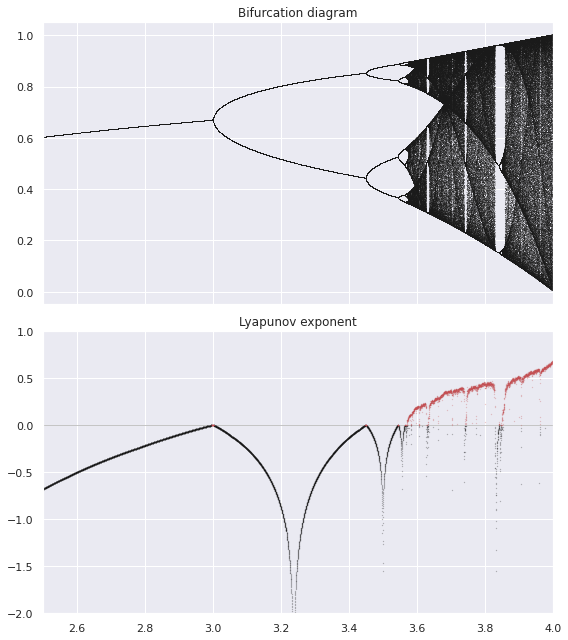

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()
